# 1.
요즘, aiffel에서 진행하는 모든 LMS 노드들과 공부자료들을 GitHub에 올리고 있다.
[여기](https://github.com/govin08/aiffel)가 해당 repository이다.

며칠 전, 실습에 사용하는 데이터 파일들을 실제 코딩하는 .ipynb파일 주변에 두어야 겠다고 생각했다.
그렇게 하면, 굳이 LMS 노드에 접속해 환경을 설정하지 않더라도, 항상 데이터 파일들에 접근할 수 있다는 장점이 있기 때문이다.
그리하여 오늘, 데이터 파일들을 .ipynb 파일 주변에 두었고, 평소처럼 commit, push를 시행했다.

오류가 났다.
오늘 클라우드 서버가 불안정하다는 말이 있었기에, '그래서 그런가보다'하고 생각하며 넘겼는데, 이후에도 commit, push를 할 때마다 오류가 났다.
급히 오류 메시지를 확인하고 구글링해보니, 아까 데이터 옮겨놓은 대용량의 파일들이 문제였다.
해당 파일들 (cifar-10, cifar-100)은 100MB가 넘는 용량을 가지고 있었는데, 이것들을 GitHub에 올리려고 시도한 것이 문제였다.
더 큰 문제는, 해당 파일들을 제거한 후 다시 commit, push를 하여도 오류가 난다는 것이었다.

다시, 구글링을 하여, 몇 개 블로그 포스트를 읽었다.
[이곳](https://iambeginnerdeveloper.tistory.com/entry/github-%EC%97%90%EB%9F%AC-%ED%95%B4%EA%B2%B0%ED%95%98%EA%B8%B0-remote-error-this-exceeds-GitHubs-file-size-limit-of-10000-MB-%EB%8C%80%EC%9A%A9%EB%9F%89-%ED%8C%8C%EC%9D%BC-push)의 방법을 사용하기로 했다.
하지만, GitHub를 지금까지 써온 바에 따르면 문제가 생길 가능성이 아주 높아보였다.
그래서, 클라우드 서버에 있는 대부분의 자료들을 내 데스크탑에 옮겨놓아 백업시켜놓고, 해당 블로그 포스트의 내용을 따라하기 시작했다.
다음과 같은 명령어들을 실행했고, 결과적으로, 해당 오류가 더이상 나지 않게 되는 데 성공했다.

 - `git reset HEAD^`
 - `git reflog`
 - `git reset HEAD@{13} `
 - `git commit -m "0914_the first commit after reset"`
 - `git push origin +master`

위의 과정에서 `13`은 내가 정한 값이다.
선택할 수 있는 여러 개의 HEAD들이 나오는데, 그 중 13번째 HEAD의 시점으로 되돌린 것으로 일단 이해했다.
마지막의 `# git push origin +master`를 하면서는 `Protected branch update failed for refs/heads/master.`와 같은 오류가 났다.
내 repository에 가서 해당 브랜치인 `master`를 unprotect 시킨 후에야 해결되었다.

# 2.

모든 것이 진정된 후에, 이 사태를 정리해보려고 이 글을 쓰게 되었는데, 막상 쓰다보니, 저 위의 명령어들이 뭘 뜻하는지 확실히 알 수 없었다.
[`git reset`](https://git-scm.com/docs/git-reset)이나 [`git reflog`](https://git-scm.com/docs/git-reflog)에 관해서는 git 공식 홈페이지의 짤막한 설명들을 찾을 수 있다.
 
 - `git reset` : Reset current HEAD to the specified state
 - `git reflog` : Manage reflog information

더 찾아보려고 해도, 불충분한 설명밖에는 찾을 수 없었는데, 그러다가 아주 좋은 글을 찾았다.
 - [Reset 명확히 이해하기](https://git-scm.com/book/ko/v2/Git-%EB%8F%84%EA%B5%AC-Reset-%EB%AA%85%ED%99%95%ED%9E%88-%EC%95%8C%EA%B3%A0-%EA%B0%80%EA%B8%B0)

git 공식 홈페이지에 올라온 글이다보니, 원래 영어로 되어 있는 글을 한글로 아주 잘 번역해 놓은 듯하다.

조금 더 정확하게는, git에 대한 공식적인 documentation(book)인데 이것은 git에 관해서 아주 잘 설명되어 있는 documentation이다.
그런데 설명이 과하지도 않고, 적절한 수준으로 적혀있는 것 같다.
이 documentation의 7.7절이 "reset 명확히 알고가기"라는 내용이고, 나는 이 부분의 한글 버전을 읽었던 것이었다.
(다 읽지는 않았다.)

설명이 정말 잘되어 있다.
git의 개념에 대해 지금껏 강의도 듣고, LMS에서도 배워도 보고 했지만, 여기 설명이 가장 깔끔하다.
아래에는 해당 글의 내용을 하나하나 적어보려고 한다.
하지만, 원본 글이 훨씬 정리가 잘 되어있음은 말할 나위가 없다.

# 3. 정리

## 3.1. 세 개의 트리 : HEAD, Index, working directory

 - Git을 서로 다른 세 트리를 관리하는 컨텐츠 관리자이다.
 - 세 트리는 다음과 같다.
 |트리               |정의|역할|
 |:-:                |:-:|:-:|
 |HEAD               |현재 브랜치를 가리키는 포인터|마지막 커밋 스냅샷, 다음 커밋의 부모 커밋|
 |Index(staging area)|바로 다음에 커밋할 것들|다음에 커밋할 스냅샷|
 |working directory  |실제로 작업하는 공간|샌드박스|

 - 아래 그림은 세 트리 사이의 관계를 간략하게 설명한다.
 
 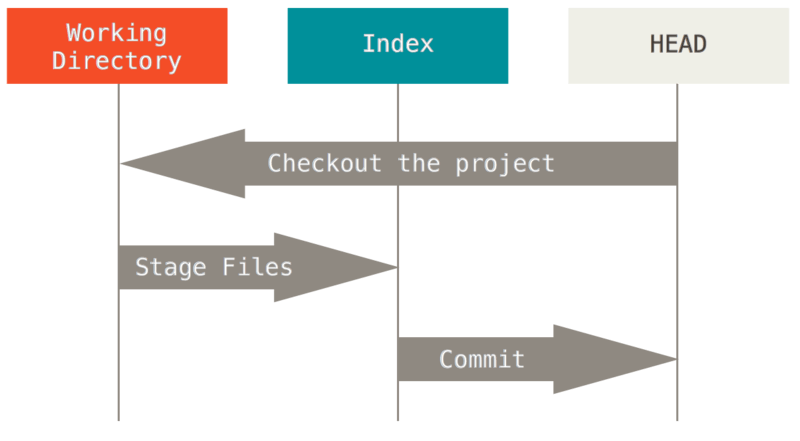

## 3.2. `git add`, `git commit`

 - working directory에 있는 파일들은 `git add`를 통해 Index로 복사한다. (해당 파일들을 stage 한다.)
 - Index에 있는 파일들은 `git commit`을 통해 스냅샷으로 영구히 저장한다.
 이때, "Index에 올라와 있는 파일들이 HEAD로 이동한다"라는 식의 표현을 쓰면 안된다.
 위의 그림만 보면 마치 그런 것처럼 되어 있지만, HEAD란 어떤 공간을 가리키는 개념이 아니다.
 정확한 표현은 다음과 같다.
 > `git commit` 명령을 실행한다.
 > 그러면 Index의 내용을 스냅샷으로 영구히 저장하고 그 스냅샷을 가리키는 커밋 객체를 만든다.
 > 그리고는 `master` 가 그 커밋 객체를 가리키도록 한다.
 
 아래는 한 번 `commit`했을 때(v1)에 관한 그림 설명이다.
 
 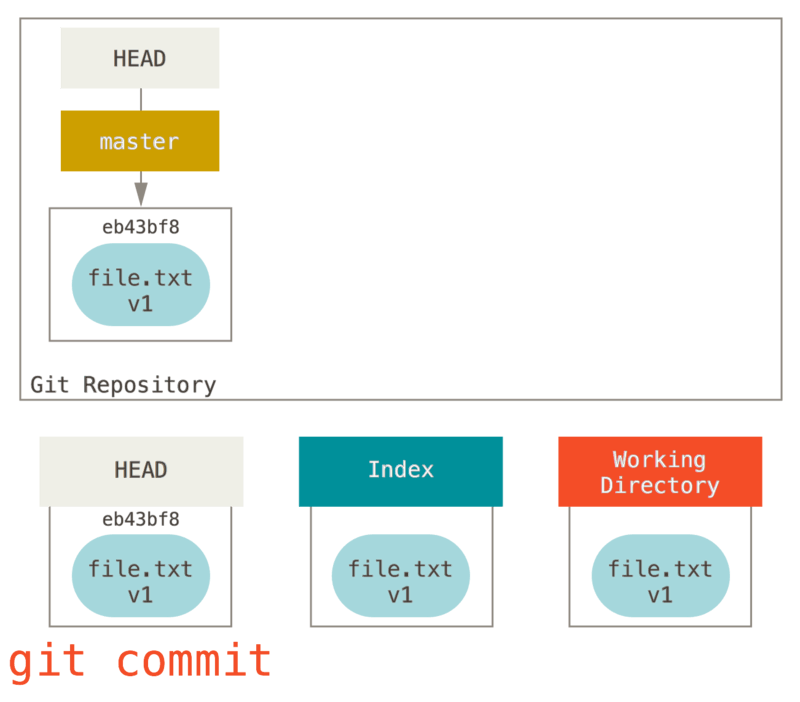

 - 커밋 객체는 영구히 저장된다.
 '영구하다'는게 얼마나 영구하다는 것인지는 모르겠지만, 그래도 적어도 한동안은 저장되는 것 같다.
 몇 번의 변경사항을 만들고 `add`, `commit`을 몇 번 더하면 커밋 객체가 영구히 저장된다는 게 무슨 말인지 알 것 같다.
 하나의 추가사항(v2)을 만들고 그것을 `add`, `commit`하면 다음과 같이 된다.
 
 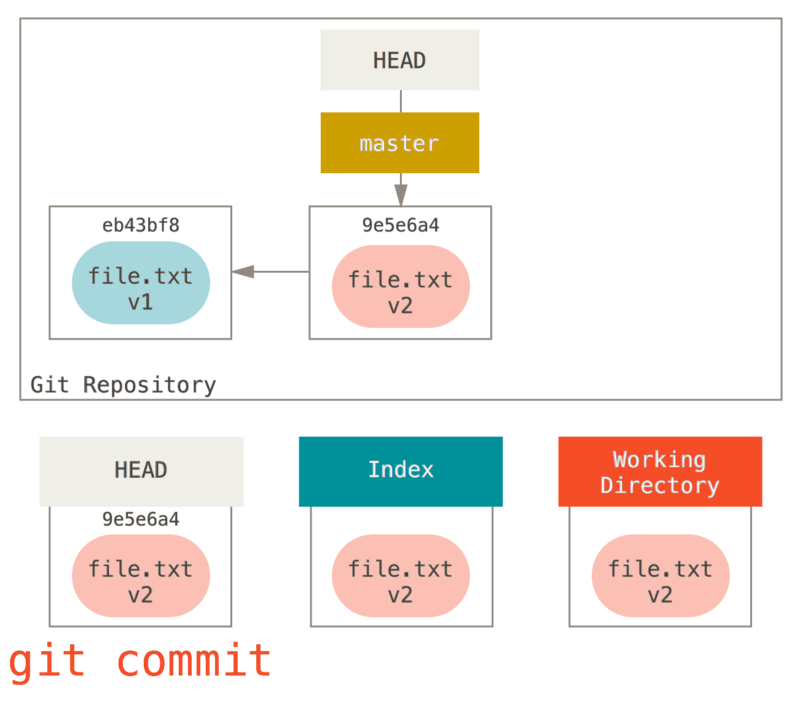
 
- 여기에서 v1과 v2는 각각 `eb43bf8`과 `9e5e6a4`라는 '이름'으로 '영구히' 저장되는 것 같다. 이때에 '이름'은 16진법으로 표현된 일곱자리 수인 것 같다.
즉, `eb43bf8`과 `9e5e6a4`와 같은 '이름'들은 지금까지 해왔던 두 번의 commit에 각각 대응된다.


 - 한번 더 `add`, `commit`을 진행하면 `38eb946`와 같은 '이름'이 하나 더 생기며, 다음과 같이 된다.
 
 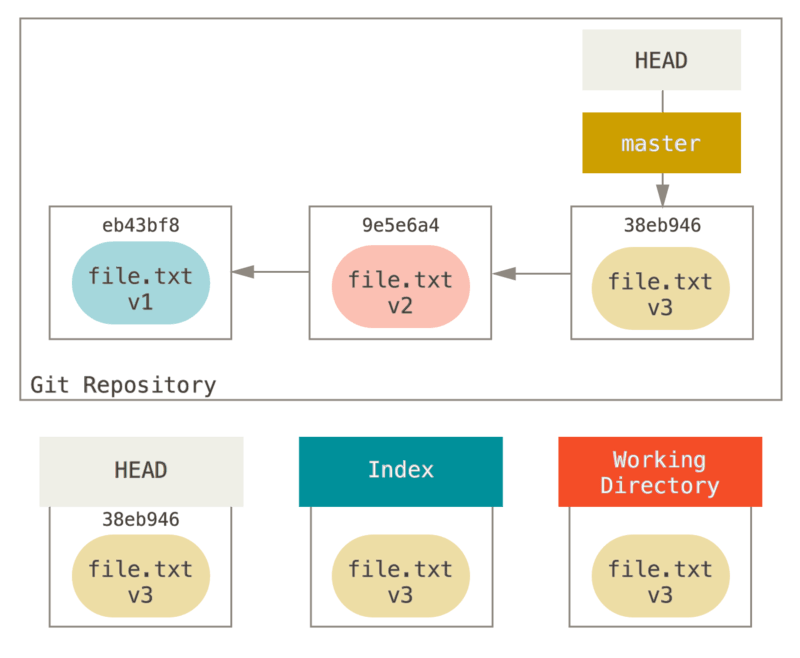

## 3.3. `git reset`

 - 사실 여기까지는 어느 정도 아는 내용들이었다.
 그리고 여기서부터가 진짜 `reset`에 대한 내용이다.
 - `reset`은 당연히 '재설정하다'라는 뜻인데, 무엇을 재설정하느냐 하면, HEAD를 재설정한다.
 아까
    - `git reset` : Reset current HEAD to the specified state
 
 라고 하는 설명이 이것이다.
 위의 그림에서 HEAD는 `38eb946`을 가리키고 있는데, `9e5e6a4`를 가리키도록 만들 수 있다.
 어떻게 하면 되느냐 하면, `git reset 9e5e6a4`라는 명령을 내리면 된다.
 이때, 다음 세 명령어는 같은 동작을 하는 것으로 보인다.
   - `git reset 9e5e6a4`
   - `git reset HEAD~`
   - `git reset --soft 9e5e6a4`
   - `git reset --soft HEAD~`
 즉 `git reset`에서 `--soft`는 기본 옵션이다.
 또, 